# Parcial 3: Introducción a Machine Learning

&emsp; **Fundación Universitaria Los Libertadores**. <br>
&emsp; **Asignatura:** Big Data. <br>
&emsp; **Período:** 2023-I. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Estudiante:**

# Salvando el Semestre

Ya es sabido: los estudiantes de Big Data de la FULL no solo son los mejores analistas de datos, sino que también son los mejores en Machine Learning. Por ello, una universidad le ha contratado para predecir cuáles son los determinantes que hacen que sus estudiantes aprueben los exámenes finales.

Para ello, le entregan la base de datos sobre diferentes datos sociodemográficos de sus estudiantes y cómo les ha ido en sus exámenes. El enlace de la base de datos se puede encontrar [aquí](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams).

El objetivo es crear un modelo que prediga, a partir de los datos sociodemográficos de un estudiante, si probablemente aprobará un examen, con tal que se pueda prestar ayuda a aquellos que estén en riesgo de no pasar.

En ese sentido, su cliente le pide que realice modelos de Machine Learning (ML) para clasificar a sus estudiantes de acuerdo con la probabilidad de que aprueben el examen. 

Para esta Universidad, un puntaje más alto a 60 puntos corresponde a aprobar el examen. Así mismo, a sus clientes le interesa observar solamente el examen de matemáticas. Si desea, puede replicar el ejercicio en los otros test, pero les importa el examen de matemáticas.

# 1. Importe de los datos

Cargue los datos y muestre las primeras 5 observaciones:

In [19]:
import pandas as pd 

test = pd.read_csv("https://raw.githubusercontent.com/JuanMartinL/Data-Science-Crash-Course/main/Parciales/Parcial%203/2023II/datain/exams.csv")
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# 2. Preprocesamiento y EDA

Rápidamente, revise las características básicas de los datos: valores perdidos, valores únicos y algunas distribuciones para guiarse.

In [20]:
print('='*64)
print("Número de valores únicos:")
print(test.nunique())
print('='*64, '\n')

print('='*64)
print("Número de valores perdidos:")
print(test.isnull().sum())
print('='*64)

Número de valores únicos:
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

Número de valores perdidos:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


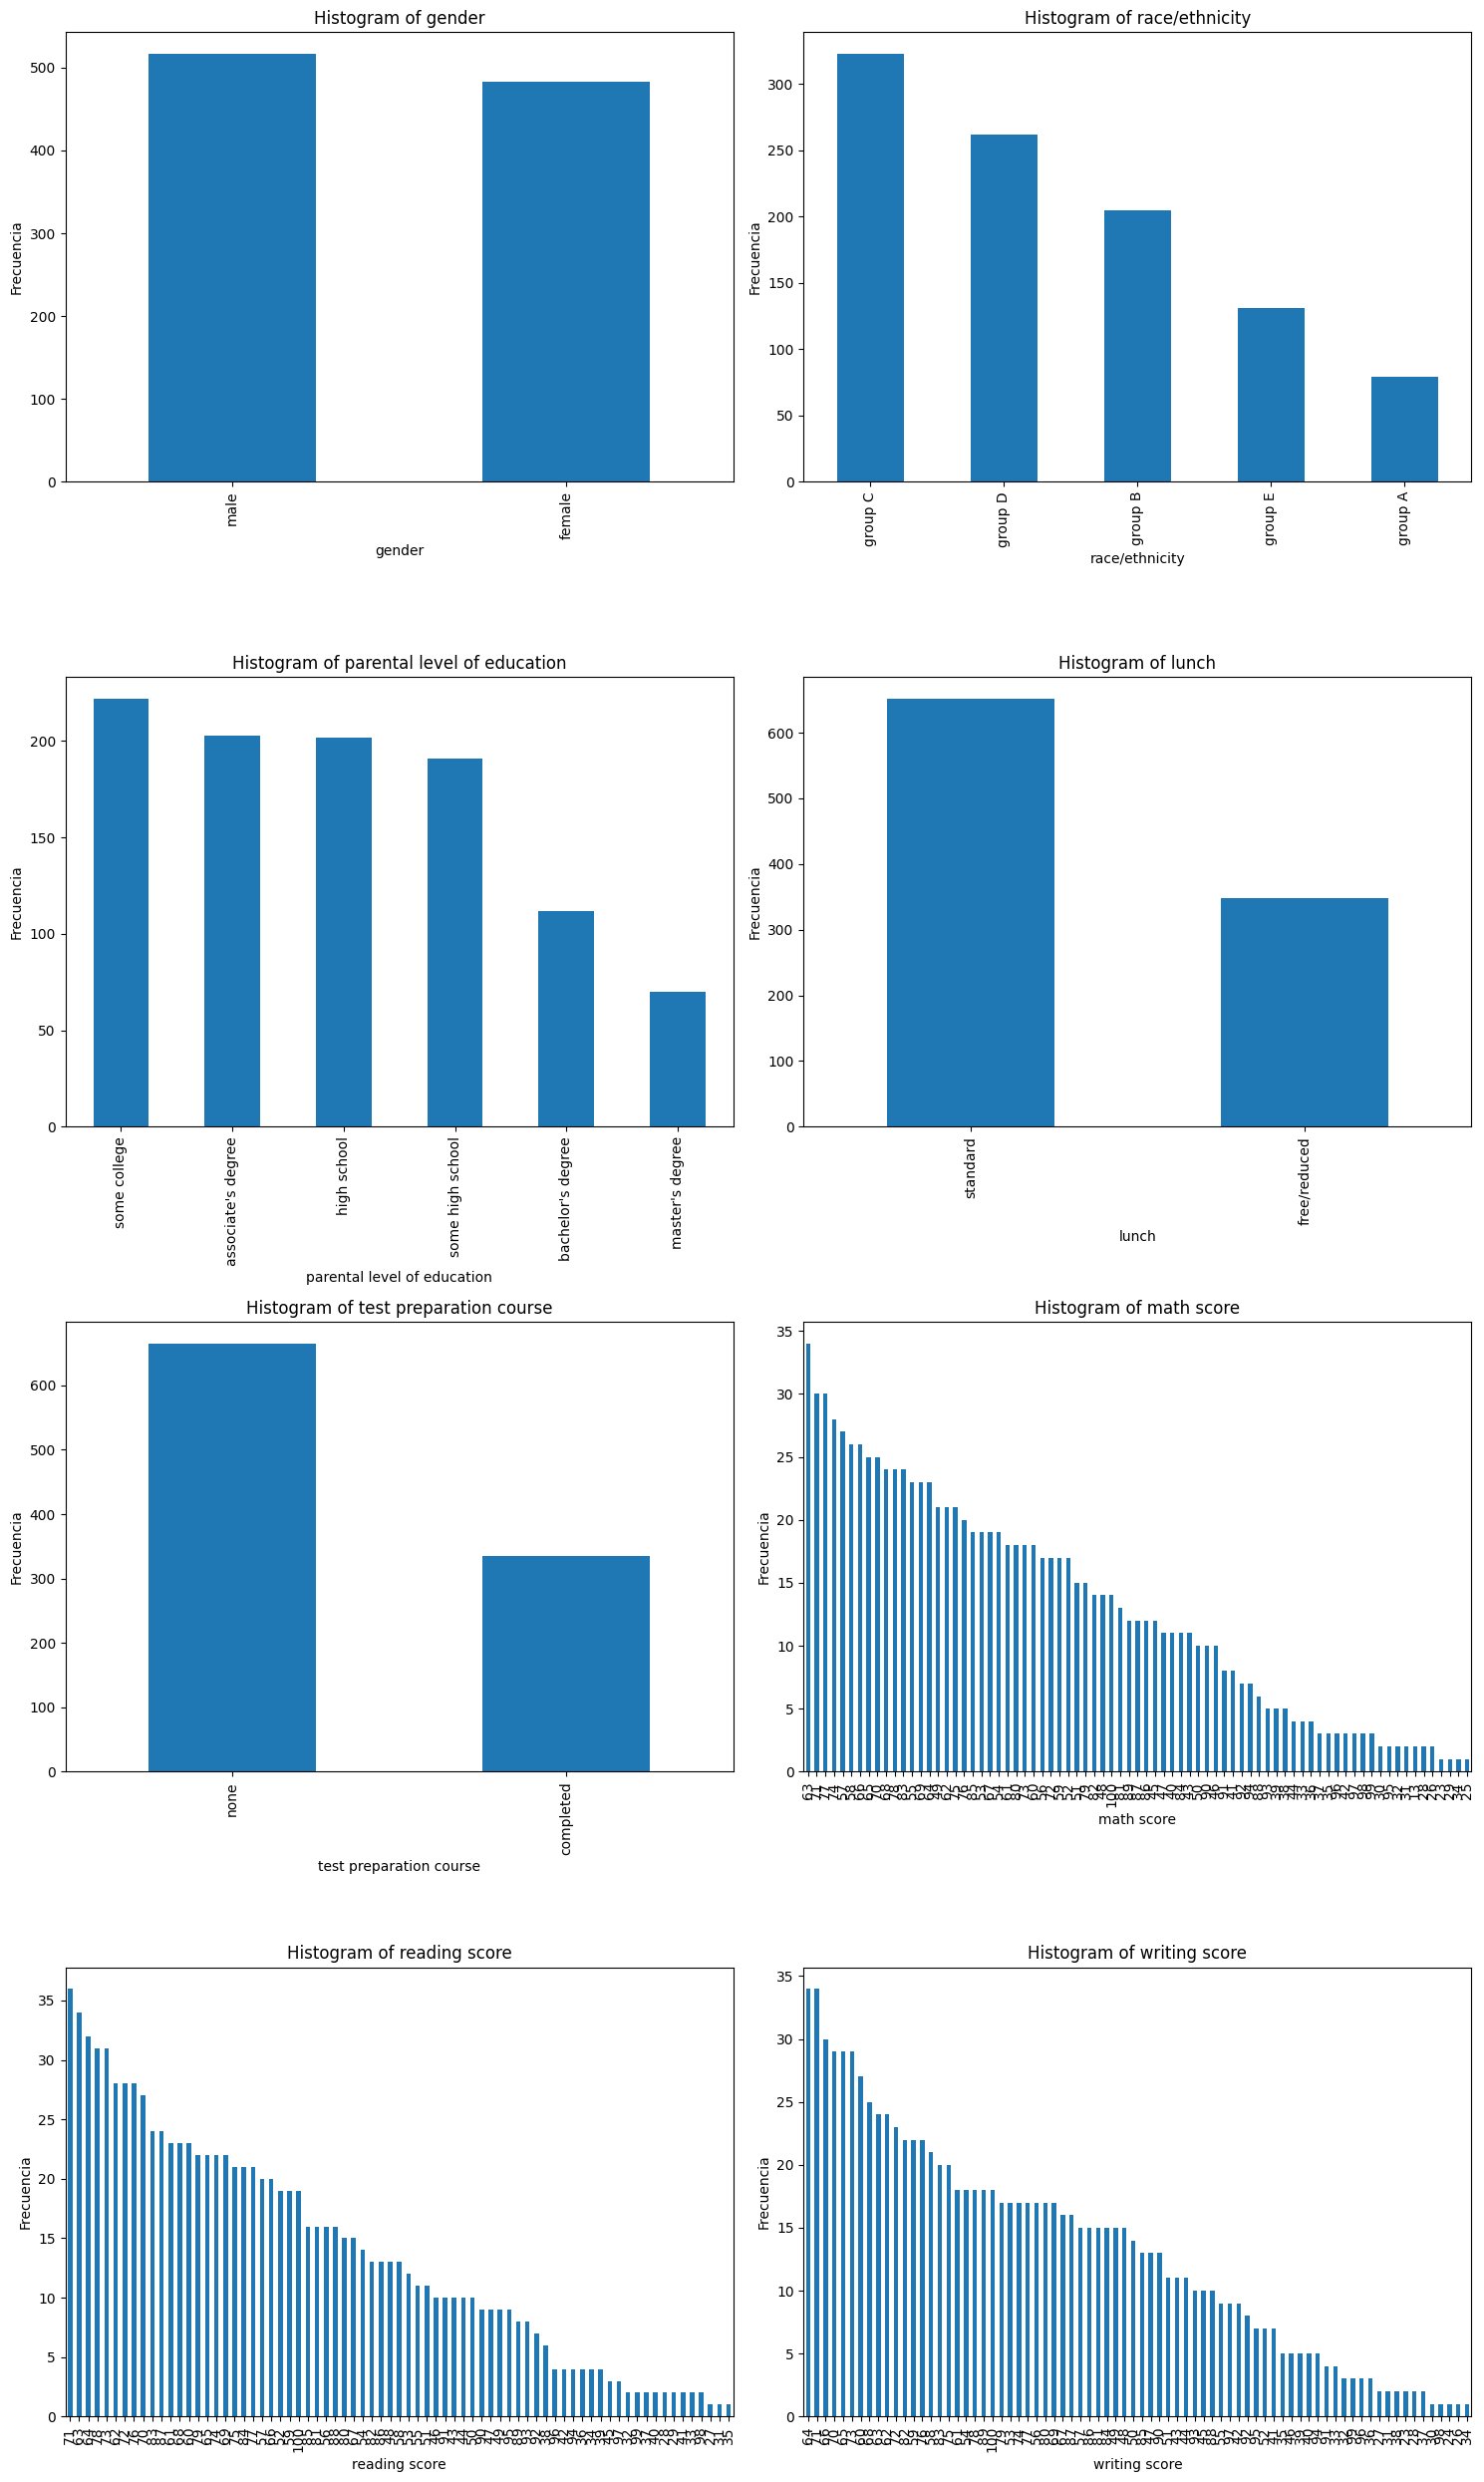

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,25))

for i, var in enumerate(test.columns):

    plt.subplot(4, 2, i +1)

    (
        test[var]
        .value_counts()
        .plot(kind = 'bar')
    )
    
    plt.title("Histogram of " + var)
    plt.ylabel("Frecuencia")

plt.tight_layout()

> "¡Pero espera un momento!" - Dice un grillo en su hombro.

¡Es Pepe Grillo!

> "Antes de empezar, debes recordar que solo vas a observar el examen de matemáticas y que te están pidiendo la probabilidad de que apruebe un estudiante dicho examen. _No te están pidiendo que predigas el puntaje_." - Recita en tu oído. 

"¿Qué significa esto?" Te preguntas.

> "¡Debes empezar creando una variable que sea igual a 1 si aprobó el examen y 0 si no lo aprobó!" - Grita Pepe Grillo cogiéndose el sombrero.

En ese sentido, construya una variable que sea la variable objetivo de predicción (o variable dependiente) que sea igual a 1 si aprobó el examen o 0 si lo reprobó. En términos de la Universidad, debe tomar el valor de 1 si el puntaje sobrepasa los 60 puntos y 0 si no lo hace.

In [22]:
test['aprobado_math'] = [1 if x >= 60 else 0 for x in test['math score']]

In [23]:
test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,aprobado_math
0,male,group A,high school,standard,completed,67,67,63,1
1,female,group D,some high school,free/reduced,none,40,59,55,0
2,male,group E,some college,free/reduced,none,59,60,50,0
3,male,group B,high school,standard,none,77,78,68,1
4,male,group E,associate's degree,standard,completed,78,73,68,1
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,1
996,male,group D,associate's degree,free/reduced,completed,85,91,92,1
997,female,group C,some high school,free/reduced,none,32,35,41,0
998,female,group C,some college,standard,none,73,74,82,1


In [24]:
pd.get_dummies(test)

,math score,reading score,writing score,aprobado_math,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,67,67,63,1,False,True,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,40,59,55,0,True,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
2,59,60,50,0,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,77,78,68,1,False,True,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
4,78,73,68,1,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73,70,65,1,False,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
996,85,91,92,1,False,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
997,32,35,41,0,True,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,True
998,73,74,82,1,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True


# 3. K vecinos más cercanos (K Nearest Neighbours)

Sus clientes le piden que realice modelos de Machine Learning (ML) para clasificar a sus nuevos clientes de acuerdo con la probabilidad de que aprueben el examen. Por ello, usted, ingeniero de ML, sabe que puede empezar con un modelo sencillo: un modelo de k vecinos más cercanos (kNN). Por ello, Pepe Grillo, su conciencia, le recuerda los pasos para realizar este modelo:

## 3.1. Preprocesamiento de los datos

Pepe le recuerda que debe realizar un preprocesamiento de los datos en primer lugar. Para ello, le recuerda que debe hacer dos cosas:

1. Convertir en categoría la variable que creó, la cual va a ser la variable objetivo para su modelo.
2. Realizar una estandarización de las variables que va a utilizar en el modelo, ya que este modelo es sensible a los niveles en los que pueden estar las variables de su base de datos. Por ello, con el módulo `preprocessing` de `sklearn`, estandarice la base de datos con la función `MinMaxScaler`(estandarización min-max).

En ese sentido, realice el primer proceso: convertir `output` en una variable categórica:

In [24]:
test['aprobado_math'] = pd.Categorical(test['aprobado_math'])

Ahora, realice el escalamiento de la base de datos con estandarización Min-Max:

In [30]:
# No se necesita, ya que todos los valores son dummies 
# o estan estandarizados

> "¡Recuerda hacer el one-hot encoding! Si no lo haces, el modelo no te funcionará." - Te recuerda Pepe Grillo.

In [29]:
vars_to_dummies = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
X = pd.get_dummies(test[vars_to_dummies], drop_first=True)

## 3.2. División de bases de datos

Pepe Grillo le jala las patas. Él sabe que usted no ha hecho nada, pero tiene por seguro que se le estaba olvidando realizar la separación de la base de datos en entrenamiento y testeo. Le dice: recuerde que su profesor le dijo que debía separar las bases de datos en entrenamiento (`train`) y testeo (`test`). Le recuerda, además, que debe hacerlo después de separar los datos entre `y` y `X`.

> **Nota:** Pepe le recomienda utilizar en la división de la base de datos una semilla con número 2023 y una separación del 20% entre testeo y entrenamiento.

In [31]:
from sklearn.model_selection import train_test_split

# Dividing y and X data
y = test['aprobado_math']
X = X

# Splitting into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

print(f"No. de ejemplos de entrenamiento: {y_train.shape[0]}")
print(f"No. de ejemplos de testeo: {y_test.shape[0]}")


No. de ejemplos de entrenamiento: 800
No. de ejemplos de testeo: 200


## 3.3. Entrenameinto del modelo

¡Llegó la hora de la fiesta! Pepe Grillo salta a su hombro y se ponen manos a la obra. Pepe le advierte que es momento de entrenar el modelo, así que le recuerda que el modelo de ML de kNN se define en la librería `sklearn`, en el módulo `neighbors`, bajo la función `KNeighborsClassifier()`. Al final, le recuerda, se descarga algo como: `from sklearn.neighbors import KNeighborsClassifier`.

Le dice que entrene el modelo por ahora con tan solo 3 vecinos:

In [32]:
# Se importa la librería y módulo
from sklearn.neighbors import KNeighborsClassifier

# Se especifica el algoritmo
knn = KNeighborsClassifier(n_neighbors = 3)

# Se entrena el modelo con las bases de datos de entrenamiento
knn.fit(X_train, y_train)

# Se predice el resultado
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

## 3.4. Evaluación del modelo

Pepe Grillo le dice que no debería evaluar el modelo, pero no se aguanta y le dice que lo haga, que pruebe con la base de testeo el rendimiento del modelo. Le recomienda que utilice la **precisión balanceada**, la cual es más adecuada en este caso que la precisión normal (pondera tanto la clase que tratamos de adivinar como la que no). 

Así que le recuerda que esto se hace con la librería `sklearn`, con el módulo `metrics`, con la función `balanced_accuracy_score()`:

In [43]:
#  Se importa el módulo de métricas
from sklearn import metrics

# Se calcula la precisión del modelo
print("Balanced Accuracy:", round(metrics.balanced_accuracy_score(y_test, y_pred), 4))

Balanced Accuracy: 0.6107


¿Qué puntaje le dio el modelo? ¿Es bajo o alto?

> **Posible respuesta:** no es ni alto ni es bajo. En términos de precisión normal, la adivinanza y la estimación por kNN se acercan bastante (adivinanza tiene 66% y kNN 66.5%). Esto se debe a que las clases están levemente sesgadas hacia el 1 (aprobado).
>
> No obstante, en la comparación de la precisión balanceada el modelo kNN se comporta mejor que la adivinanza con la clase más frecuente (50% para la adivinanza y 61.07% para kNN). Sin embargo, no es aún significativa.

In [36]:
(
    test['aprobado_math']
    .value_counts()
)

aprobado_math
1    665
0    335
Name: count, dtype: int64

In [44]:
#  Se importa el módulo de métricas
from sklearn import metrics

# Se crea una adivinanza para estimar
y_guess = [1]*len(y_test)

#  Se importa el módulo de métricas
from sklearn import metrics

# Se calcula la precisión del modelo
print("Balanced Accuracy with kNN estimates:", round(metrics.accuracy_score(y_test, y_pred), 4))

# Se calcula la precisión del modelo
print("Balanced Accuracy guessing:", round(metrics.accuracy_score(y_test, y_guess), 4))

Balanced Accuracy with kNN estimates: 0.665
Balanced Accuracy guessing: 0.66


# 3.5. Optimización de parámetros

Pepe Grillo le recuerda que **no debería devolverse después de hacer la prueba con la base de datos de testeo**, pero también recuerda que usted es estudiante por lo que debe enseñarle unas cosas adicionales. Por ello, le permite por esta y única vez que pueda devovlerse a hacer la optimización de los parámetros. 

Por eso, le pide que en una sola celda divida la base de datos en entrenamiento y testeo y entrene el modelo con k vecinos entre 1 y 100. Es decir, realice un ciclo que entrene el modelo con `k` vecinos, guarde la precisión balanceada y siga con el siguiente. Por último, muestre el número `k` de vecinos que maximiza la **precisión balanceada** del modelo:

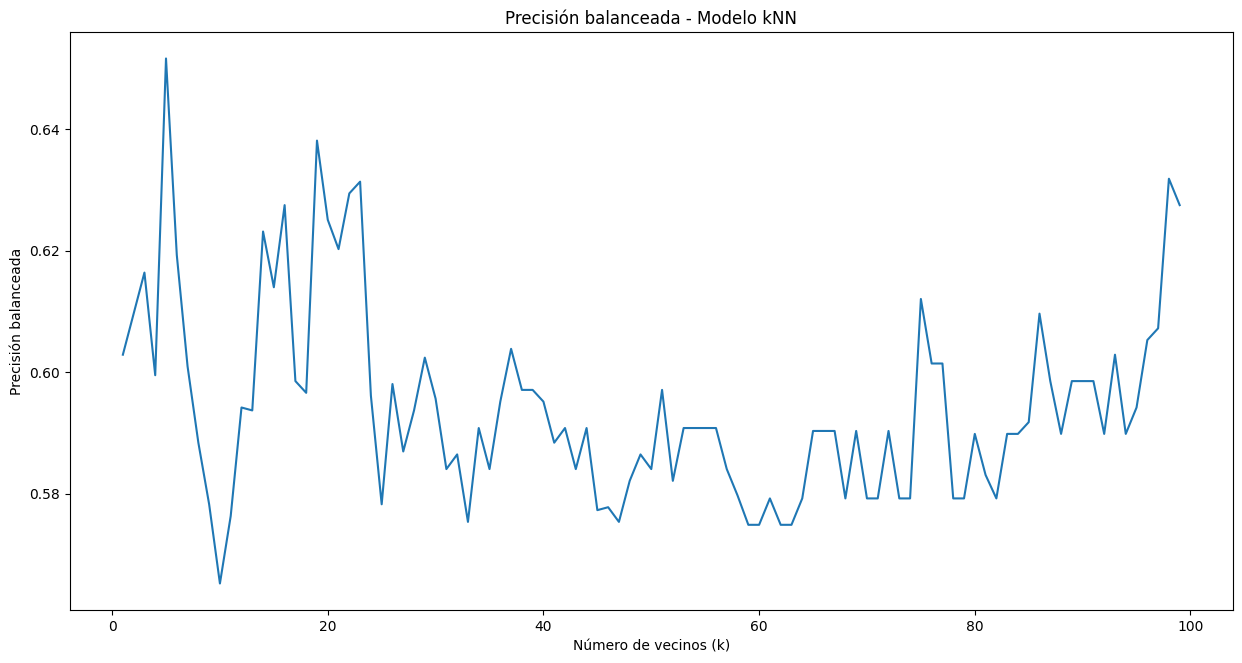

,k,b_precision,f1
4,5,0.651691,0.778281
18,19,0.638164,0.782222
97,98,0.631884,0.849206
22,23,0.631401,0.784141
21,22,0.629469,0.771300
...,...,...,...
62,63,0.574879,0.804878
58,59,0.574879,0.804878
59,60,0.574879,0.804878
61,62,0.574879,0.804878


In [45]:
# Se importa la librería y módulo
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score

import matplotlib.pyplot as plt

# Dividing y and X data
y = test['aprobado_math']
X = X

# Splitting into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2023)

# Se crea una base de datos para guardar los resultados
res = pd.DataFrame(columns = ["k", "b_precision", "f1"])

for k in range(1, 100):

    # Se especifica el algoritmo
    knn = KNeighborsClassifier(n_neighbors = k)

    # Se entrena el modelo con las bases de datos de entrenamiento
    knn.fit(X_train, y_train)

    # Se predice el resultado
    y_pred = knn.predict(X_val)

    # Se agregan los resultados
    res = pd.concat([res, pd.DataFrame({"k": k, "b_precision" : [balanced_accuracy_score(y_val, y_pred)], "f1": [f1_score(y_val, y_pred)]})], ignore_index = True)

plt.figure(figsize = (15, 7.5))
plt.plot(res['k'], res['b_precision'])
plt.title('Precisión balanceada - Modelo kNN')
plt.xlabel('Número de vecinos (k)'); plt.ylabel('Precisión balanceada')
plt.show()

res.sort_values('b_precision', ascending=False)

> ¡No tan rápido, vaquero! Pepe Grillo está casi seguro que se le estaba olvidando que el ciclo de optimización se realiza con **la base de datos de validación, no la de testeo**. Con sorbito de juguito juzgador le dice que se devuelva y lo intente otra vez.

## 3.6. Evaluación del modelo final

Ahora sí, Pepe Grillo le dice que realice la medición del modelo final con el `k` óptimo que le entregó la validación del ciclo anterior. Para ello, debe entrenar el nuevo modelo con el `k` óptimo y realizar la predicción del modelo.

In [46]:
# Se importa la librería y módulo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Se especifica el algoritmo
knn = KNeighborsClassifier(n_neighbors = 1)

# Se entrena el modelo con las bases de datos de entrenamiento
knn.fit(X_train, y_train)

# Se predice el resultado
y_pred = knn.predict(X_test)

# Se calcula la precisión del modelo
print("="*64)
print("Precisión Balanceada:", round(balanced_accuracy_score(y_test, y_pred), 4))
print("="*64)

Precisión Balanceada: 0.592


¿Cuánta fue la precisión balanceada de este modelo? ¿Fue mejor o peor?

> Pepe Grillo le va a explicar qué ocurrió. Probablemente le ocurrió que el `k` óptimo le otorgó una precisión balanceada menor de la que obtuvo cuando hizo el primer modelo adivinando el `k`. ¿Por qué ocurre esto? 
>
> Elemental, le dice Pepe Grillo. Como le había comentado su profesor, en este punto usted está intercambiando **sesgo** por **varianza**. ¿Cómo así? Al entrenar con una base de datos (entrenamiento) y elegir el parámetro óptimo con otra (validación), usted está reduciendo el error por varianza que ocurre al ingresar nuevos datos. Si usted encuentra el k óptimo adivinando, puede que haya sido suerte, cuando con este método se asegura de encontrar una metodología reproducible y con argumentos que sostenga su elección, además que puede que funcione con nuevos datos.
>
> Así que, le recuerda Pepe, no se preocupe. Pronto todo tendrá sentido.

# 4. Decision Tree

¡Siguiente modelo! Le dice Pepe. Ahora vamos a intentar con un árbol de decisión. ¿Le emociona? ¡Claro que sí! Vamos por eso.

## 4.1. Entrenamiento del modelo

Pepe Grillo le dice que ya no es necesario tener en dos celdas diferentes su código para separar la base de datos de entrenamiento y testeo y otro para entrenar el modelo. Él cree que ya usted va adquiriendo experiencia suficiente para realizar todo el código en una sola celda, aunque es un reto. Si no puede, está bien, es mejor hacer algo por partes que no hacerlo. Por ello le dice que haga la separación de la base de datos (con semilla 2023), entrene el modelo de árbol de decisión sin ningún parámetro y evalúe su rendimiento con la base de datos de testeo.

Las funciones adicionales que utilizará son:
* Para el árbol de decisión, utilizará `sklearn`, el módulo `tree`, la función `DecisionTreeClassifier()`.

In [47]:
# Importamos los paquetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import balanced_accuracy_score

# Splitting X and y
y = test['aprobado_math']
X = X

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

# Definimos el modelo
clf = DecisionTreeClassifier()

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

print("="*64)
print("El rendimiento del modelo es: ", round(balanced_accuracy_score(y_test, y_pred), 3))
print("="*64)

El rendimiento del modelo es:  0.596


¿Cuál fue el rendimiento del modelo? ¿Es bueno o malo? ¿Mejoró o empeoró?

## 4.2. Optimización de parámetros

Pepe Grillo le dice que usted puede, que confía en usted: vamos a optimizar parámetros. Le va a ayudar con algo, que es la grilla de optimización (tranquilo, es un diccionario con los parámetros a observar). Con ella realice la optimización de parámetros y encuentre el mejor modelo:

In [48]:
# Definiremos los parámetros a revisar
params ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting X and y
y = test['aprobado_math']
X = X

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2023)

res = pd.DataFrame(columns = ['criterion', 'max_depth', 'max_features', 'splitter', 'b_accuracy'])

for criterion in params['criterion']:
    for max_depth in params['max_depth']:
        for max_features in params['max_features']:
            for splitter in params['splitter']:

                # Entrenamiento
                clf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, max_features = max_features, splitter = splitter)\
                            .fit(X_train, y_train)

                # Predicción
                y_pred = clf.predict(X_val)

                res = pd.concat([res, pd.DataFrame({'criterion': [criterion], 'max_depth': [max_depth], 'max_features': [max_features], \
                    'splitter': splitter, 'b_accuracy': [balanced_accuracy_score(y_val, y_pred)]})], ignore_index = True)

res.sort_values('b_accuracy', ascending = False)

,criterion,max_depth,max_features,splitter,b_accuracy
205,entropy,6,0.4,random,0.650242
184,entropy,4,sqrt,best,0.636715
187,entropy,4,log2,random,0.632850
186,entropy,4,log2,best,0.630918
207,entropy,6,0.6,random,0.630435
...,...,...,...,...,...
19,gini,2,log2,random,0.500000
20,gini,2,0.2,best,0.500000
21,gini,2,0.2,random,0.500000
171,entropy,2,sqrt,random,0.500000


## 4.3. Evaluación del modelo final

Ahora sí, vamos con toda: evalúe el modelo final que encontró en el punto anterior y encuentre el rendimiento del modelo con la base de datos de testeo:

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting X and y
y = test['aprobado_math']
X = X

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

# Definimos el modelo
clf = DecisionTreeClassifier(criterion = res.iloc[0]['criterion'], max_depth = res.iloc[0]['max_depth'],\
     max_features = res.iloc[0]['max_features'], splitter = res.iloc[0]['splitter']).fit(X_train, y_train)


# Predicción
y_pred = clf.predict(X_test)

print("="*64)
print("El rendimiento del modelo es: ", round(accuracy_score(y_test, y_pred), 3))
print("="*64)

El rendimiento del modelo es:  0.65


¿Cómo es el rendimiento del modelo? ¿Mejora respecto al modelo anterior?

> ¡Bonus! Esto se lo regala Pepe Grillo: una optimización de híperparámetros por validación cruzada por búsqueda aleatoria. Es decir, la búsqueda de los mejores parámetros por medio de pruebas aleatorias entre los parámetros. Esto ayuda porque en ocasiones la validación cruzada resulta muy demandante computacionalmente.
>
> Así, para dejarle este regalo, le muestra cómo se realiza esta mejor búsqueda que, como se va a ver, mejora el rendimiento del modelo porque reduce la varianza por la validación cruzada que utiliza toda la base de datos de entrenamiento:

In [52]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting X and y
y = test['aprobado_math']
X = X

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Size of train dataset: ", X_train.shape[0])
print("Size of test dataset: ", X_test.shape[0])

# Definiremos los parámetros a revisar
params ={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 50, 2),
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = DecisionTreeClassifier()

# Cross_Validation
clf_est = RandomizedSearchCV(clf, params , n_iter=10, cv=3, scoring='balanced_accuracy').fit(X_train, y_train)

print(clf_est.best_estimator_)
print(clf_est.best_params_)

# Prediction
y_pred = clf_est.predict(X_test)

print("="*64)
print("El rendimiento del modelo es: ", round(balanced_accuracy_score(y_test, y_pred), 3))
print("="*64)


Size of train dataset:  800
Size of test dataset:  200
DecisionTreeClassifier(max_depth=26, splitter='random')
{'splitter': 'random', 'max_features': None, 'max_depth': 26, 'criterion': 'gini'}
El rendimiento del modelo es:  0.594


# 5. Logistic Regression

¡Último modelo! Vamos a probar una regresión logística, dice Pepe Grillo. Esta la conoces bastante, te dice, y es apropiada para este tipo de problemas, ya que tiene una función que se ajusta a las probabilidades (¡a la probabilidad de que alguien apruebe el examen!).

Probemos:

# 5.1. Entrenamiento del modelo

Separe la base de dato y entrene el modelo. Para la regresión logística se utiliza de `sklearn`, del módulo `linear_model`, la función `LogisticRegression()`:

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings

# Ignoring warnings as they've been already checked
warnings.filterwarnings('ignore')

# Splitting X and y
y = test['aprobado_math']
X = X

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Definimos el modelo
log_reg = LogisticRegression()

# Entrenamos el modelo
log_reg.fit(X_train, y_train)

# Predicción
y_pred = log_reg.predict(X_test)

print("="*64)
print("El rendimiento del modelo es: ", round(balanced_accuracy_score(y_test, y_pred), 3))
print("="*64)

El rendimiento del modelo es:  0.668


¿Cómo se desempeña este modelo? ¿Mejor o peor?

## 5.2. Optimización de los parámetros

Ahora optimice parámetros. Pepe le entrega un diccionario para buscar parámetros y le dice que optimice y encuentre el mejor, utilizando cualquier tipo de optimización que desee:

In [54]:
# Definiremos los parámetros a revisar
params ={
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'dual': [True, False],
    'C': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'random_state' : [2023]
}

In [55]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ignoring warnings as they've been already checked
import warnings
warnings.filterwarnings('ignore')

# Splitting X and y
X = X
y = test['aprobado_math']

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

# Definiremos los parámetros a revisar
params ={
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'dual': [True, False],
    'C': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'random_state' : [2023]
}


log_reg = LogisticRegression()

# Cross_Validation
log_reg_est = RandomizedSearchCV(log_reg, params , n_iter=10, cv=3, scoring='accuracy').fit(X_train, y_train)

print("="*64)
print("Specifications of best model (via Randomized CV):\n")
print(log_reg_est.best_estimator_)
print(log_reg_est.best_params_)
print("="*64, "\n")

# Prediction
y_pred = log_reg_est.predict(X_test)

print("="*64)
print("El rendimiento del modelo es: ", round(accuracy_score(y_test, y_pred), 3))
print("="*64, "\n")

Specifications of best model (via Randomized CV):

LogisticRegression(C=1.4, random_state=2023, solver='sag')
{'solver': 'sag', 'random_state': 2023, 'penalty': 'l2', 'multi_class': 'auto', 'dual': False, 'C': 1.4}

El rendimiento del modelo es:  0.68



¿El rendimiento mejora? ¿Cuál es el mejor modelo de los tres? ¿Cuál le recomienda utilizar a sus clientes?